## Application with many flies
show relative orientation, distance and relative angle. Yellow x marks the reference fly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from videoreader import VideoReader
import xarray as xr
import xarray_behave as xb

In [9]:
def plot_frame_text(vr, dataset, time, nflies, data_text, ref_fly, data_text_name):
    frame_number = int(np.unique(dataset.nearest_frame.sel(time=time, method='nearest').data))
    frame = vr[frame_number]
    vtime = dataset.time[dataset.nearest_frame == frame_number][0].values
    
    plt.imshow(frame, cmap='Greys')
    plt.plot(dataset.pose_positions_allo.loc[vtime, :, :, 'x'], dataset.pose_positions_allo.loc[vtime, :, :, 'y'], '.')
    for ifly in range(nflies):
        if ifly != ref_fly:
            plt.text(dataset.pose_positions_allo.loc[vtime, ifly, 'thorax', 'x']+30, dataset.pose_positions_allo.loc[vtime, ifly, 'thorax', 'y']-5, f"{data_text.loc[vtime,ref_fly,ifly].values.astype(int)}", color='red', fontsize=15)
    plt.scatter(dataset.pose_positions_allo.loc[vtime, ref_fly, 'thorax', 'x'], dataset.pose_positions_allo.loc[vtime, ref_fly, 'thorax', 'y'], marker='X', s=400, c='yellow', alpha=0.33)
    plt.xlim(0, frame.shape[0])
    plt.ylim(0, frame.shape[1])
    plt.title(f"{data_text_name}", fontsize=15)
    plt.axis('off')

## Assemble data

In [3]:
# assemble data
datename = 'localhost-20190828_105541'
expsetup = 'backlight'
root = f'/Volumes/ukme04/#Data/{expsetup}'

dataset = xb.assemble(datename, root=root, dat_path='dat.processed')
metrics_dataset = xb.assemble_metrics(dataset)

# loading specific metrics
rel_orientations = metrics_dataset.rel_features.sel(relative_features='relative_orientation')
dist = metrics_dataset.rel_features.sel(relative_features='distance')
rel_angle = metrics_dataset.rel_features.sel(relative_features='relative_angle')

# loading video object
video_path = f'/Volumes/ukme04/#Data/{expsetup}/dat.processed/{datename}/{datename}.mp4'
print(f'   loading video object from {video_path}')
vr_bl = VideoReader(video_path)

/Users/clemens10/Library/CloudStorage/Dropbox/code.py/xarray_behave/src/xarray_behave/io/poses.py:239: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(zarr_store).load()  # the final `load()` prevents
/Users/clemens10/Library/CloudStorage/Dropbox/code.py/xarray_behave/src/xarray_behave/metrics.py:86: RuntimeWarning: invalid value encountered in cos
  fwdlat[:, :, 0] = mags * np.cos(angle_diff)  # forward
/Users/clemens10/Library/CloudStorage/Dropbox/code.py/xarray_behave/src/xarray_behave/metrics.py

   loading video object from /Volumes/ukme04/#Data/backlight/dat.processed/localhost-20190828_105541/localhost-20190828_105541.mp4


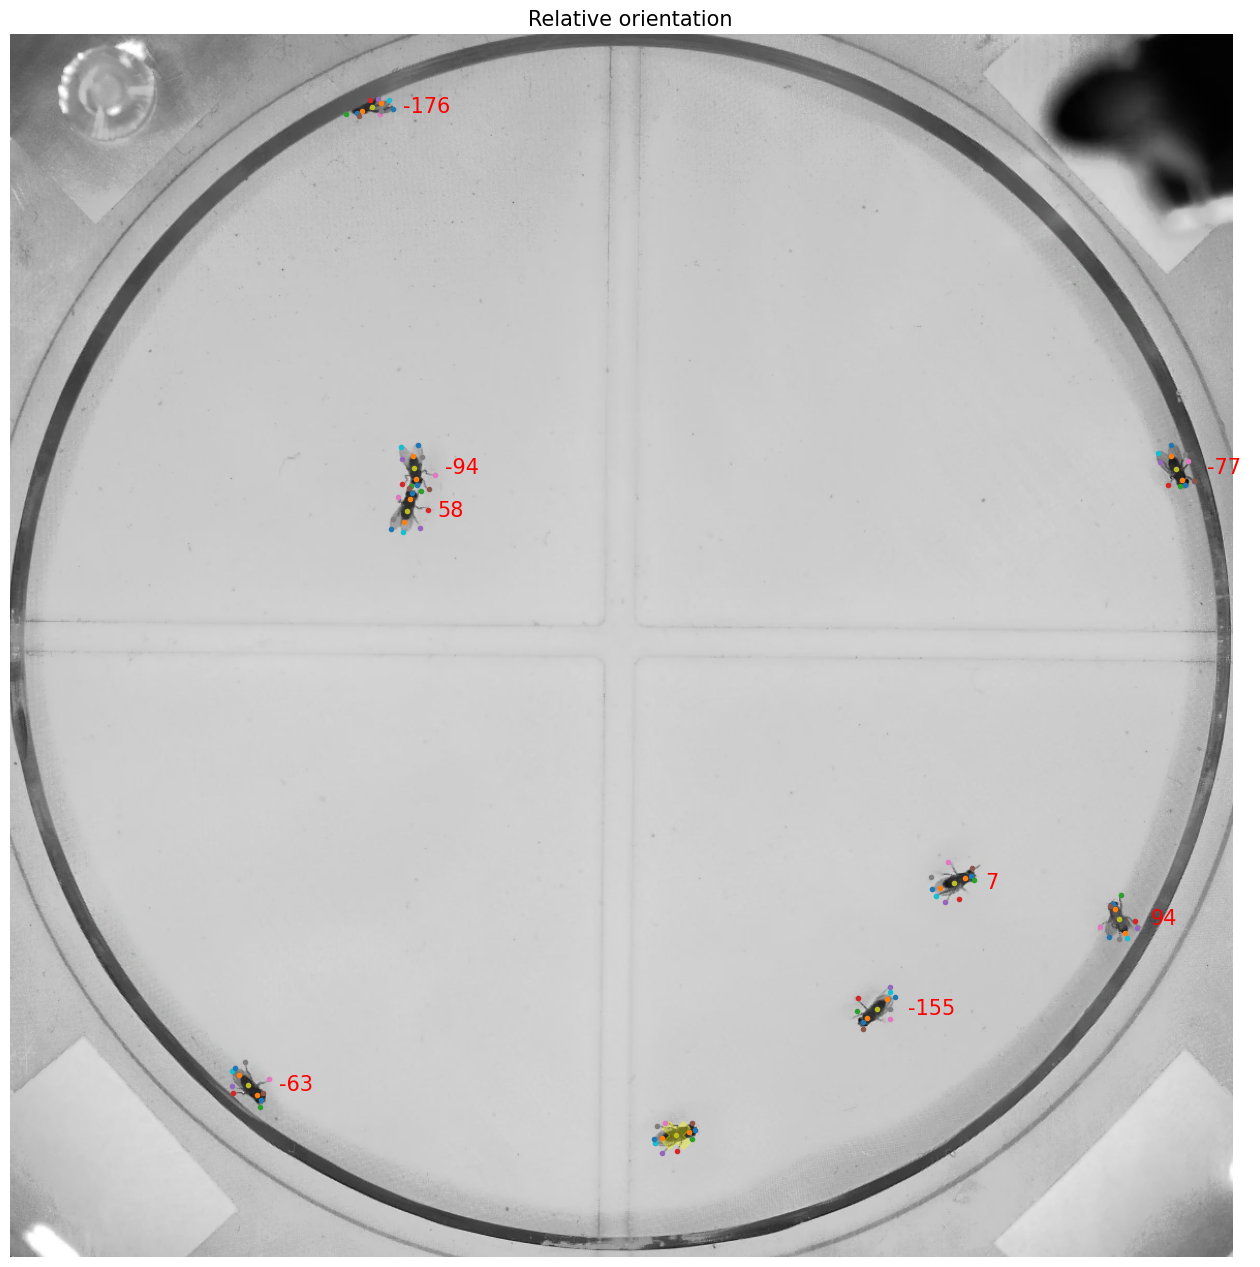

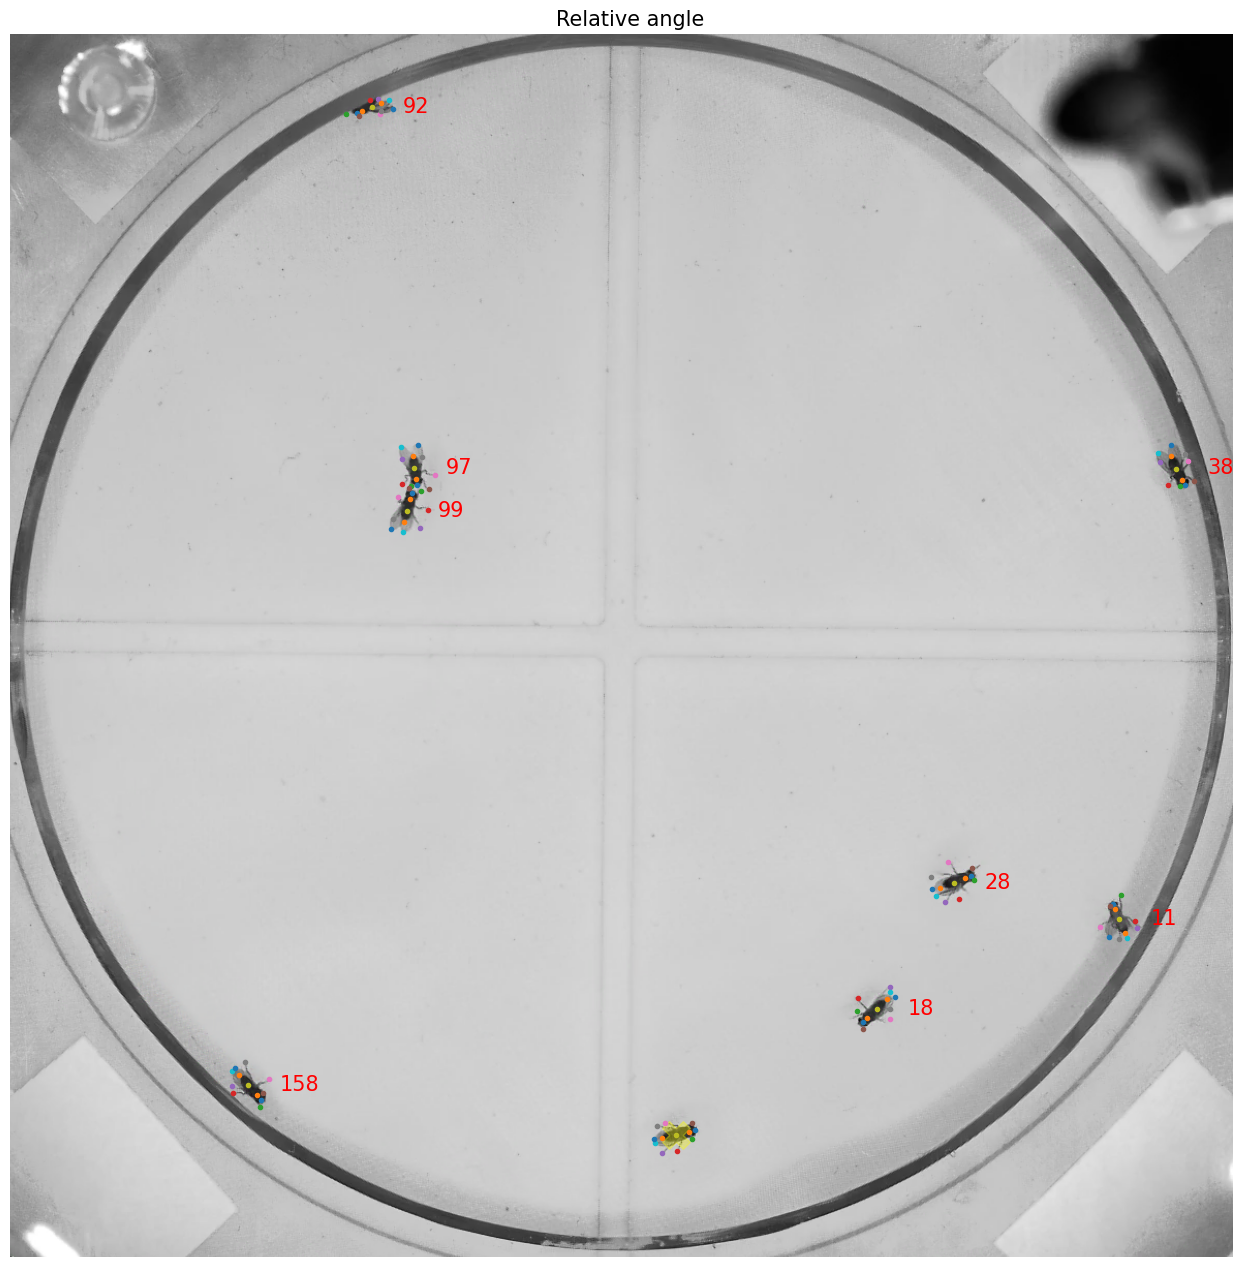

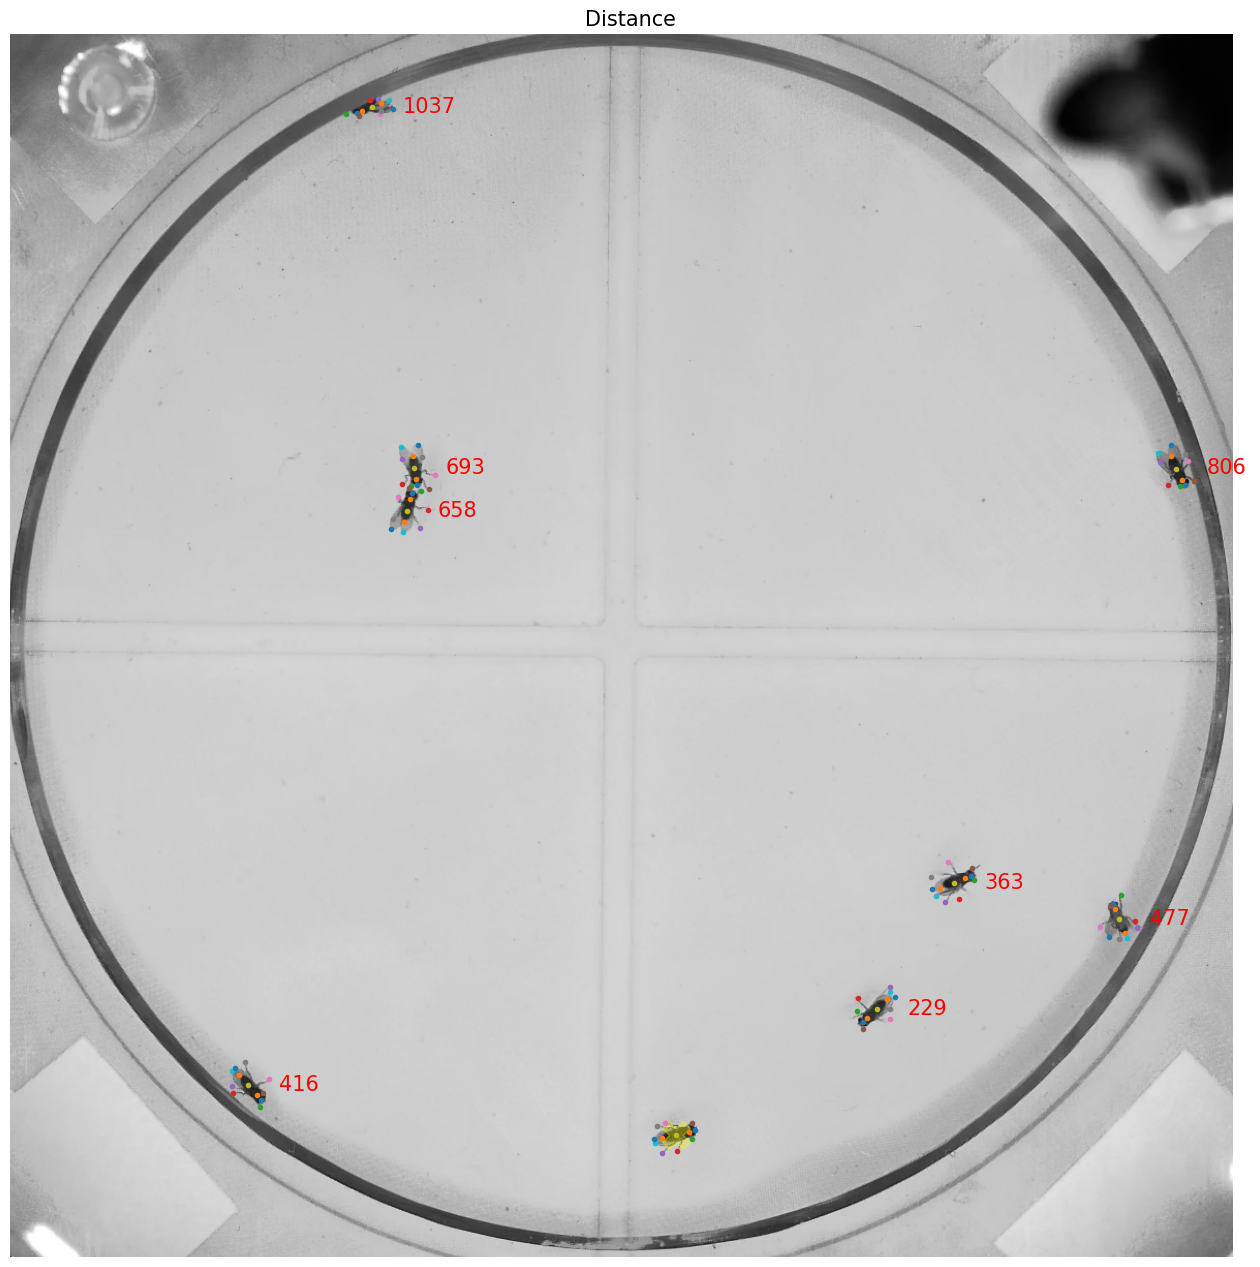

In [10]:
time = 18
frame_number = np.unique(dataset.nearest_frame.sel(time=time, method='nearest').data)
dataset.nearest_frame.sel(time=time, method='nearest')

plt.figure(figsize=(16, 16))
plot_frame_text(vr_bl, dataset, time, rel_orientations.shape[1], rel_orientations, ref_fly=0, data_text_name='Relative orientation')
plt.show()

plt.figure(figsize=(16, 16))
plot_frame_text(vr_bl, dataset, time, rel_orientations.shape[1], rel_angle, ref_fly=0, data_text_name='Relative angle')
plt.show()

plt.figure(figsize=(16, 16))
plot_frame_text(vr_bl, dataset, time, rel_orientations.shape[1], dist, ref_fly=0, data_text_name='Distance')
plt.show()